# World Happiness Report Data Analysis Project

In this project i will work with the <a href="https://www.kaggle.com/unsdsn/world-happiness">World Happiness Report Data Set</a> from <a href="https://www.kaggle.com/">kaggle.com</a>. The World Happiness Report is an annual report of the United Nations Sustainable Development Solutions Network. The rankings are based on global surveys where participants rate their happiness based on a scale of 0 to 10. I want to explore the data of the 2015 - 2019 surveys to find patterns and trends.

### Setup

Importing libraries and data.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

whr2015 = pd.read_csv("2015.csv")
whr2016 = pd.read_csv("2016.csv")
whr2017 = pd.read_csv("2017.csv")
whr2018 = pd.read_csv("2018.csv")
whr2019 = pd.read_csv("2019.csv")

### First Impressions of the Data

The data covers five annual happiness reports, spanning from 2015 to 2019. The reports can be found <a href="https://worldhappiness.report/archive/">here</a>. The columns representing different categories are not completely consistent between reports. 

#### 2015 Report:
- Country
- Region
- Happiness Rank
- Happiness Score
- Standard Error
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity
- Dystopia Residual

#### 2016 Report:

Additional columns:
- Lower Confidence Interval
- Upper Confidence Interval

Missing column:
- Standard Error

#### 2017 Report: 

Additional columns: 
- Whisker.high
- Whisker.low

Missing column:
- Standard Error

#### 2018 Report:

Additional columns: 
- Social support
- Perceptions of corruption

Missing columns:
- Region
- Family
- Trust (Government Corruption)

"Social support" is replacing "Family" as a category. "Perceptions of corruption" is replacing "Trust (Government Corruption)"

#### 2019 Report:
Same as the 2018 Report.

<a href="https://worldhappiness.report/faq/">More details about the data.</a>

In [41]:
print("World Happiness Report 2015:\n", whr2015.head(), "\n""\n", "World Happiness Report 2016:\n", 
      whr2016.head(), "\n""\n", "World Happiness Report 2017:\n", whr2017.head(), "\n""\n", "World Happiness Report 2018:\n", 
      whr2018.head(), "\n""\n", "World Happiness Report 2019:\n", whr2019.head())




World Happiness Report 2015:
        Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                

In [42]:
print("World Happiness Report 2015:\n", whr2015.describe(), "\n""\n","World Happiness Report 2016:\n", 
      whr2016.describe(), "\n""\n", "World Happiness Report 2017:\n", whr2017.describe(), "\n""\n", "World Happiness Report 2018:\n", 
      whr2018.describe(), "\n""\n", "World Happiness Report 2019:\n", whr2019.describe())

World Happiness Report 2015:
        Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%      

### Distribution

I explore the distribution of happiness scores by using histograms. It appears that the the scores are mostly distributed normally.

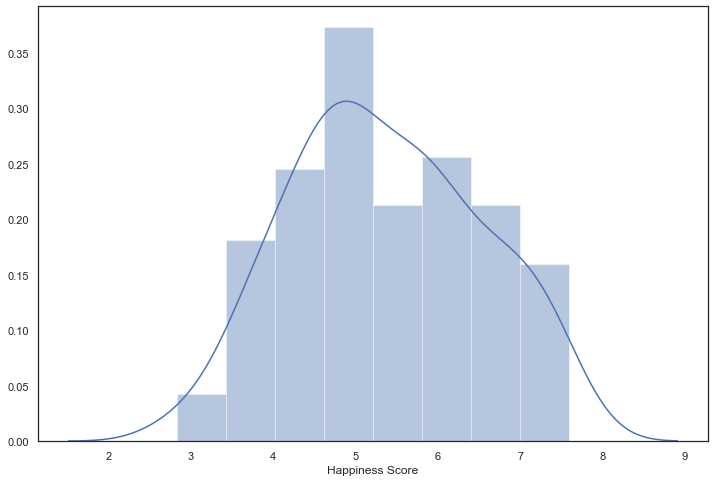

In [43]:
sns.set(style="white")
plt.rcParams["figure.figsize"] = (12, 8)
ax1 = sns.distplot(whr2015["Happiness Score"])
plt.show()

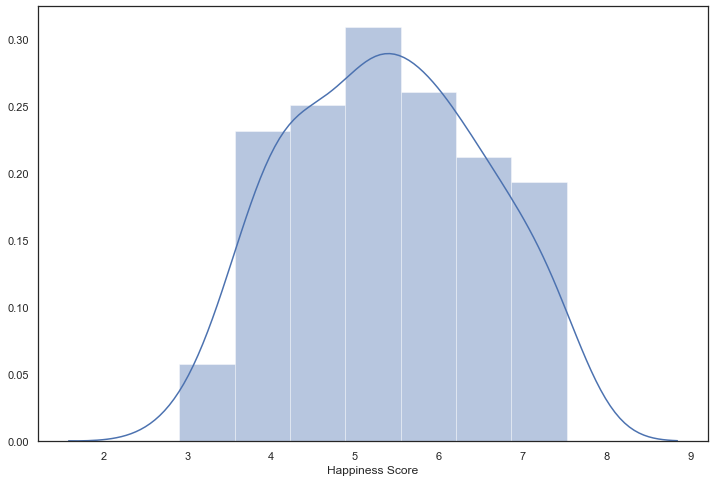

In [44]:
ax2 = sns.distplot(whr2016["Happiness Score"])
plt.show()

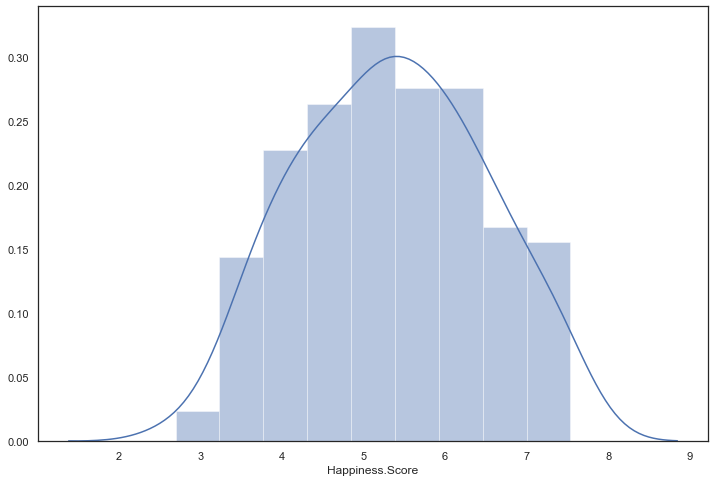

In [45]:
ax3 = sns.distplot(whr2017["Happiness.Score"])
plt.show()

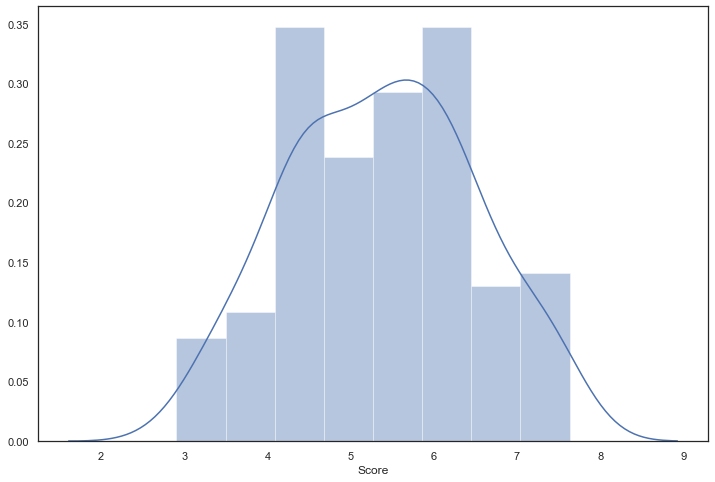

In [46]:
ax4 = sns.distplot(whr2018["Score"])
plt.show()

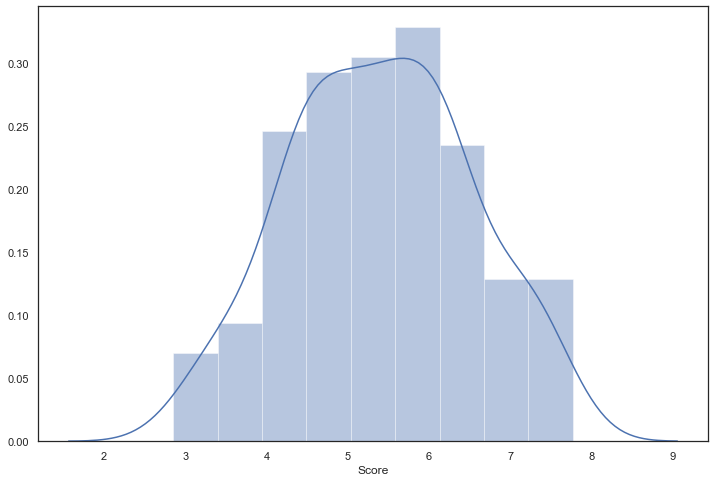

In [47]:
ax5 = sns.distplot(whr2019["Score"])
plt.show()

### Correlations

I use heatmaps to visualize correlations between columns. There are strong corrleations between the happiness score and economy (0.78 - 0.81), family (0.75 - 0.78) and health expectancy (0.72 - 0.78) throughout all five reports. These values appear to be very consistent. In the middle tier of influential factors are Freedom (0.54 - 0.57) and Trust (0.38 - 0.43). Generosity has the lowest correlation (0.076 - 0.18) of the categories, however it is still significantly positively correlated.

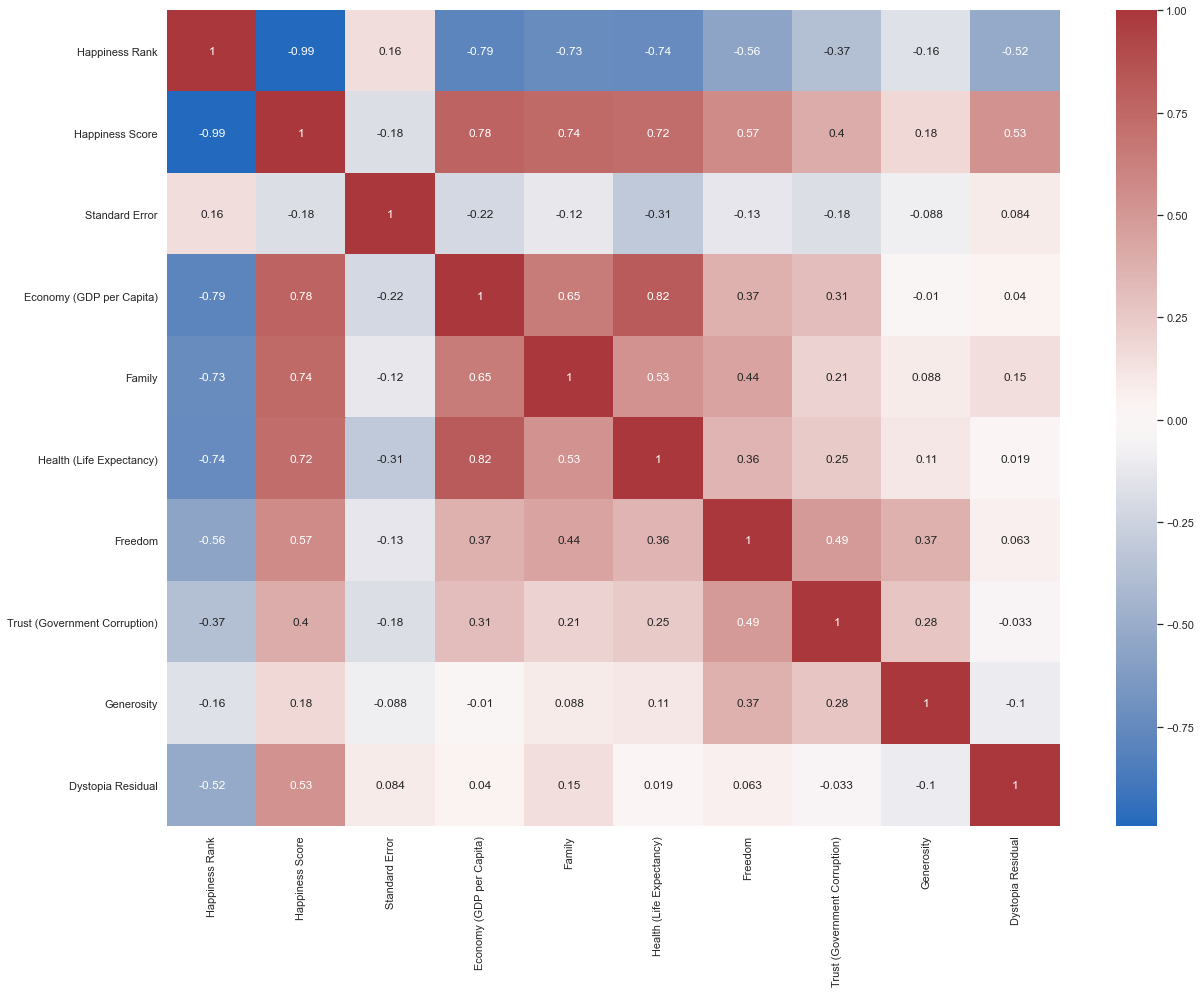

In [48]:
plt.rcParams["figure.figsize"] = (20, 15)
sns.heatmap(whr2015.corr(), cmap = "vlag", annot = True)

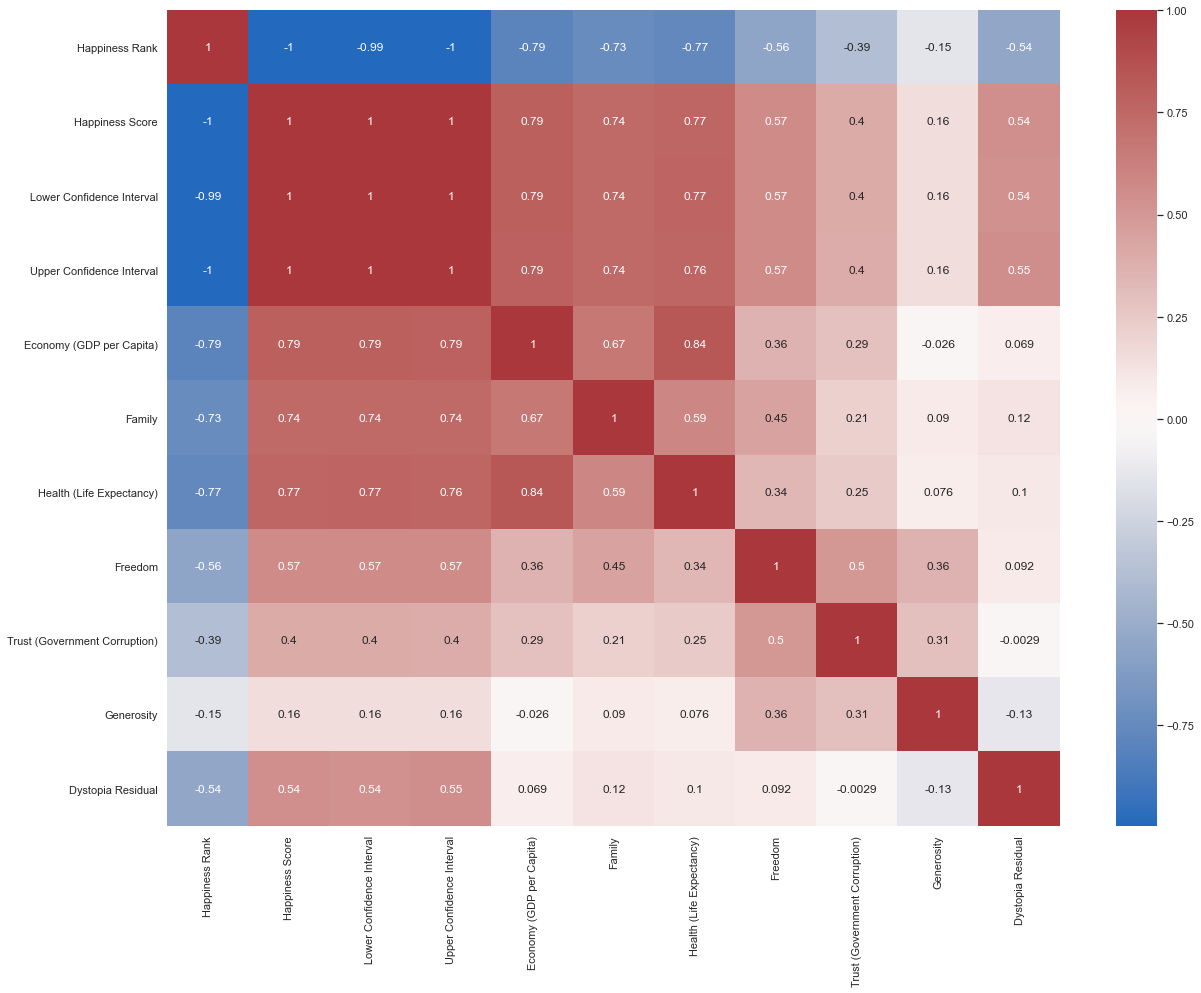

In [49]:
plt.rcParams["figure.figsize"] = (20, 15)
sns.heatmap(whr2016.corr(), cmap = "vlag", annot = True)

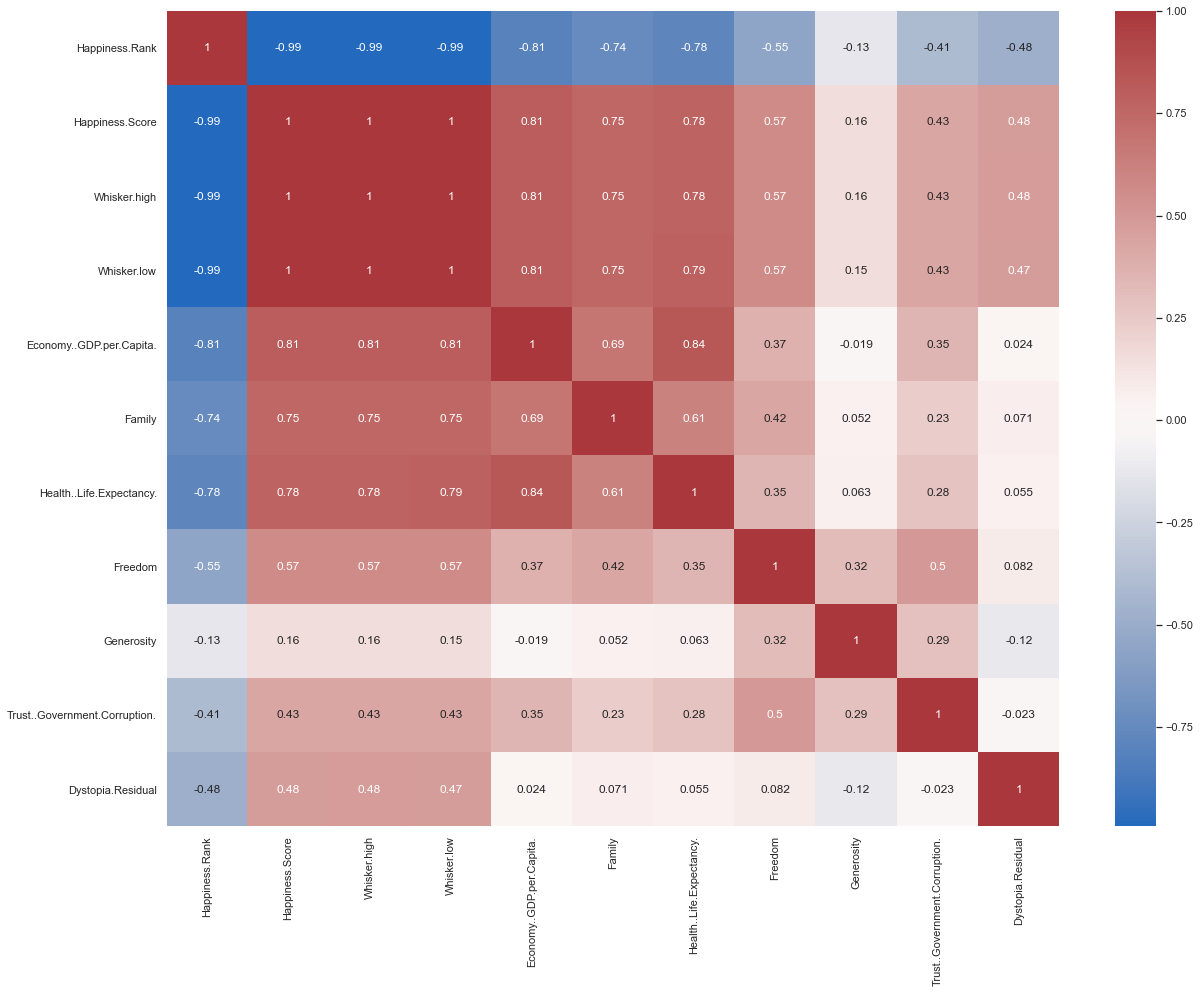

In [50]:
plt.rcParams["figure.figsize"] = (20, 15)
sns.heatmap(whr2017.corr(), cmap = "vlag", annot = True)

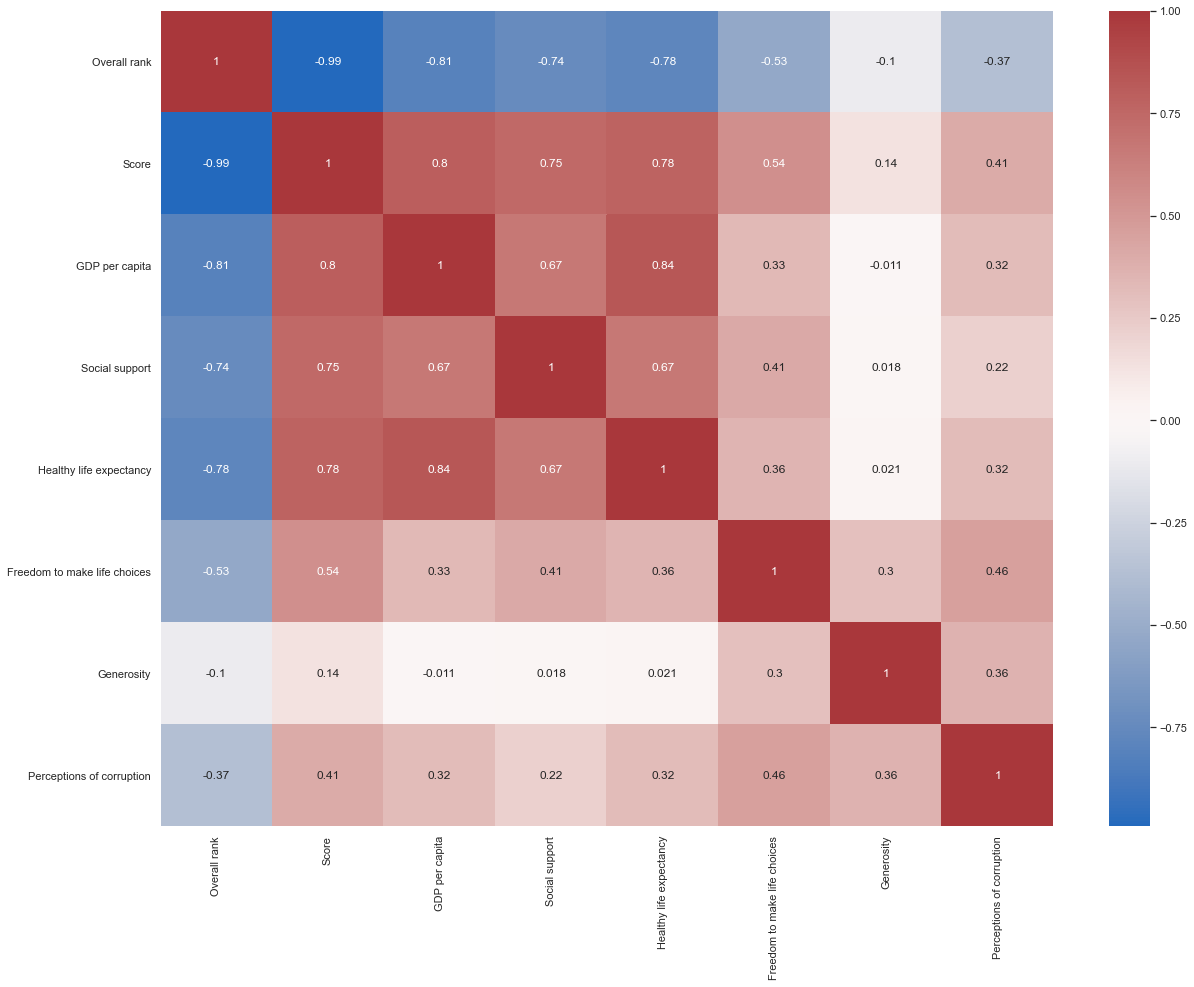

In [51]:
plt.rcParams["figure.figsize"] = (20, 15)
sns.heatmap(whr2018.corr(), cmap = "vlag", annot = True)

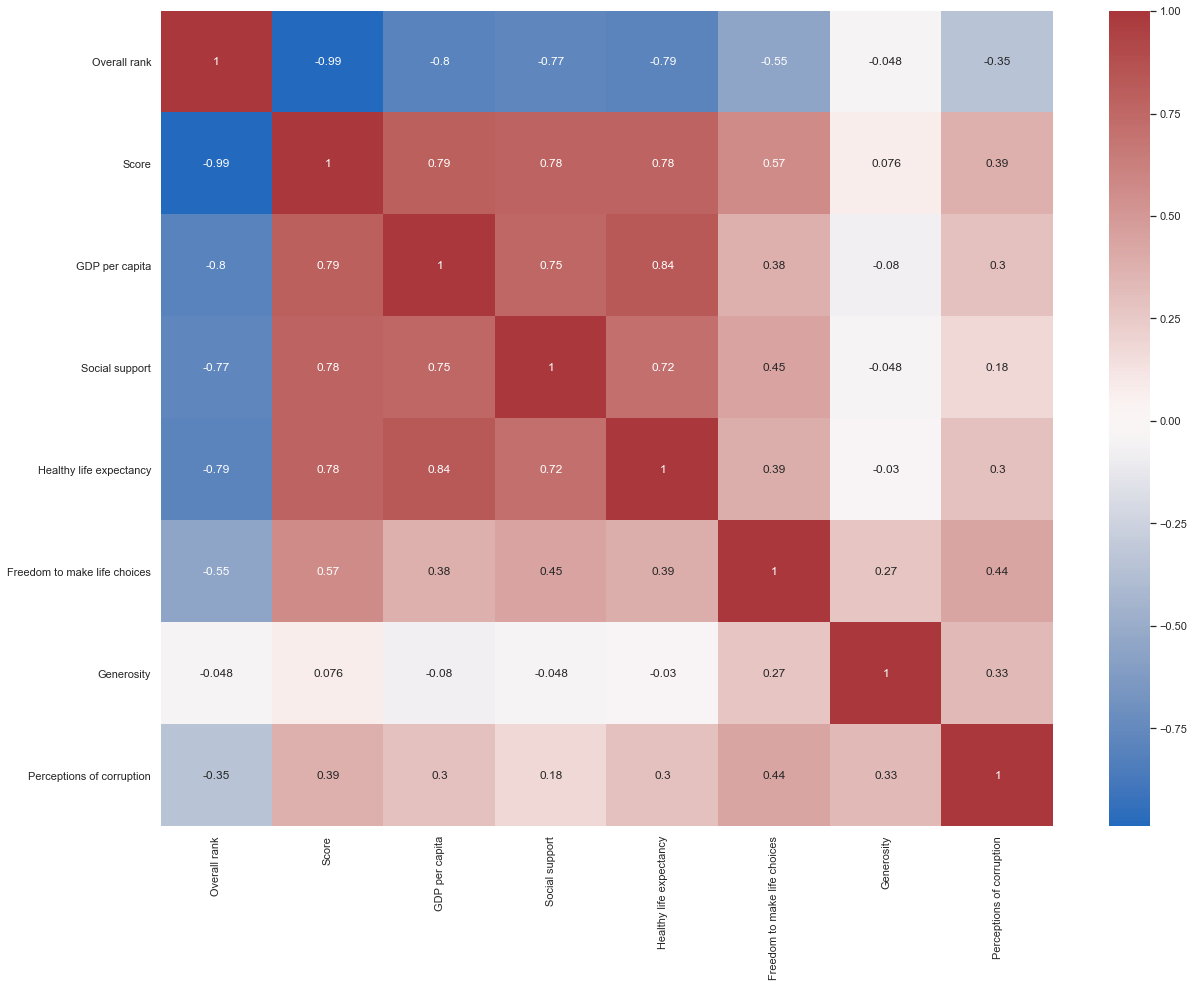

In [52]:
plt.rcParams["figure.figsize"] = (20, 15)
sns.heatmap(whr2019.corr(), cmap = "vlag", annot = True)

### Highest / Lowest Scores

I want to explore happiness scores to see which countries have the highest scores and which have the lowest. I use a horizontal bar graph for this visualization.
The importance of GDP and health suggests, that the happiest countries are most likely highly developed countries, while the countries with the lowest score are probably third world countries. Let's take a look at the Top 20 and Bottom 20 for the years 2015 - 2019.

In [53]:
top20_2015 = whr2015.sort_values(by = ["Happiness Score"], ascending = False).head(20)
print(top20_2015)

                 Country                           Region  Happiness Rank  \
0            Switzerland                   Western Europe               1   
1                Iceland                   Western Europe               2   
2                Denmark                   Western Europe               3   
3                 Norway                   Western Europe               4   
4                 Canada                    North America               5   
5                Finland                   Western Europe               6   
6            Netherlands                   Western Europe               7   
7                 Sweden                   Western Europe               8   
8            New Zealand        Australia and New Zealand               9   
9              Australia        Australia and New Zealand              10   
10                Israel  Middle East and Northern Africa              11   
11            Costa Rica      Latin America and Caribbean              12   

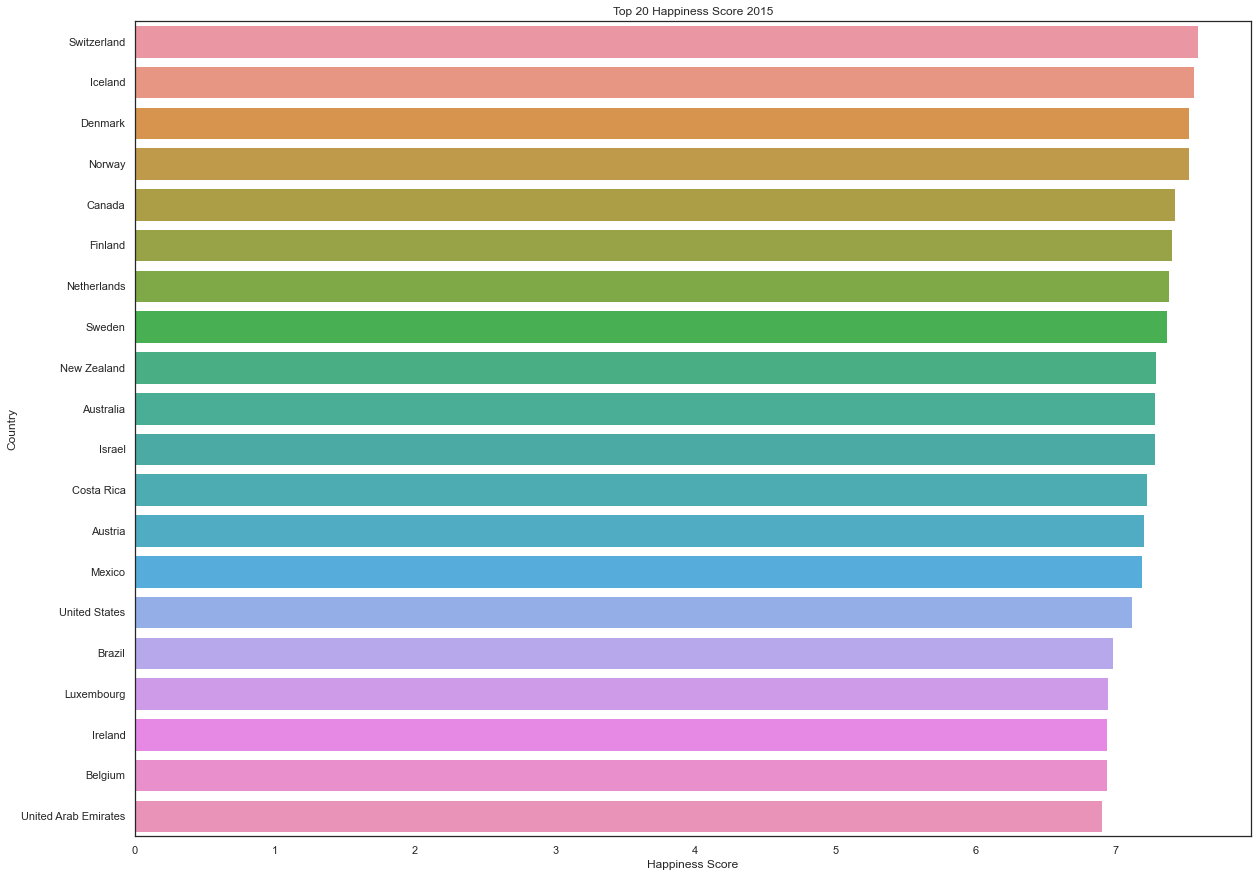

In [54]:
ax = sns.barplot(y="Country", x="Happiness Score", data=top20_2015).set_title("Top 20 Happiness Score 2015")

In [55]:
bottom20_2015 = whr2015.sort_values(by = ["Happiness Score"], ascending = False).tail(20)
print(bottom20_2015)

                      Country                           Region  \
138       Congo (Brazzaville)               Sub-Saharan Africa   
139                   Comoros               Sub-Saharan Africa   
140                    Uganda               Sub-Saharan Africa   
141                   Senegal               Sub-Saharan Africa   
142                     Gabon               Sub-Saharan Africa   
143                     Niger               Sub-Saharan Africa   
144                  Cambodia                Southeastern Asia   
145                  Tanzania               Sub-Saharan Africa   
146                Madagascar               Sub-Saharan Africa   
147  Central African Republic               Sub-Saharan Africa   
148                      Chad               Sub-Saharan Africa   
149                    Guinea               Sub-Saharan Africa   
150               Ivory Coast               Sub-Saharan Africa   
151              Burkina Faso               Sub-Saharan Africa   
152       

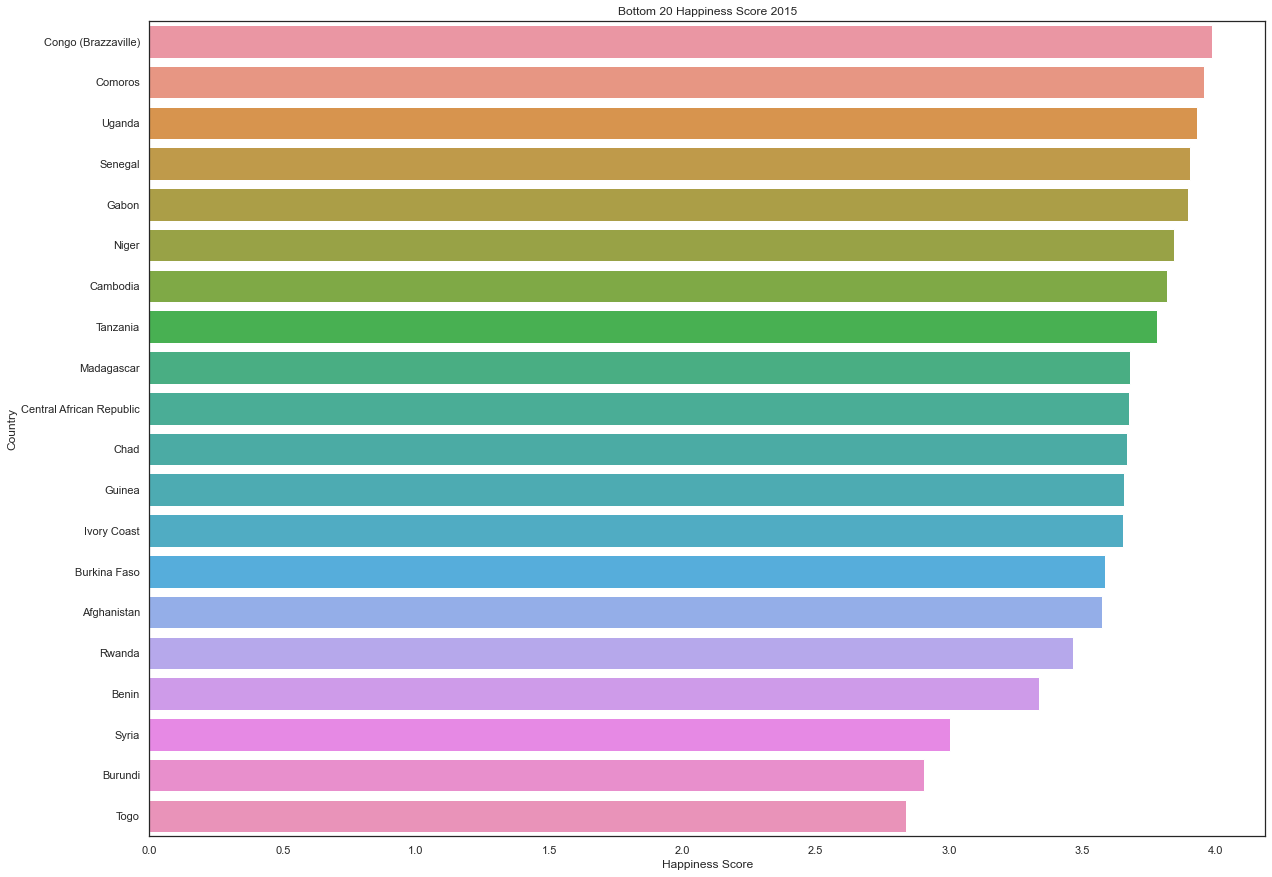

In [56]:
ax = sns.barplot(y="Country", x="Happiness Score", data=bottom20_2015).set_title("Bottom 20 Happiness Score 2015")

In [57]:
top20_2016 = whr2016.sort_values(by = ["Happiness Score"], ascending = False).head(20)
print(top20_2015)

                 Country                           Region  Happiness Rank  \
0            Switzerland                   Western Europe               1   
1                Iceland                   Western Europe               2   
2                Denmark                   Western Europe               3   
3                 Norway                   Western Europe               4   
4                 Canada                    North America               5   
5                Finland                   Western Europe               6   
6            Netherlands                   Western Europe               7   
7                 Sweden                   Western Europe               8   
8            New Zealand        Australia and New Zealand               9   
9              Australia        Australia and New Zealand              10   
10                Israel  Middle East and Northern Africa              11   
11            Costa Rica      Latin America and Caribbean              12   

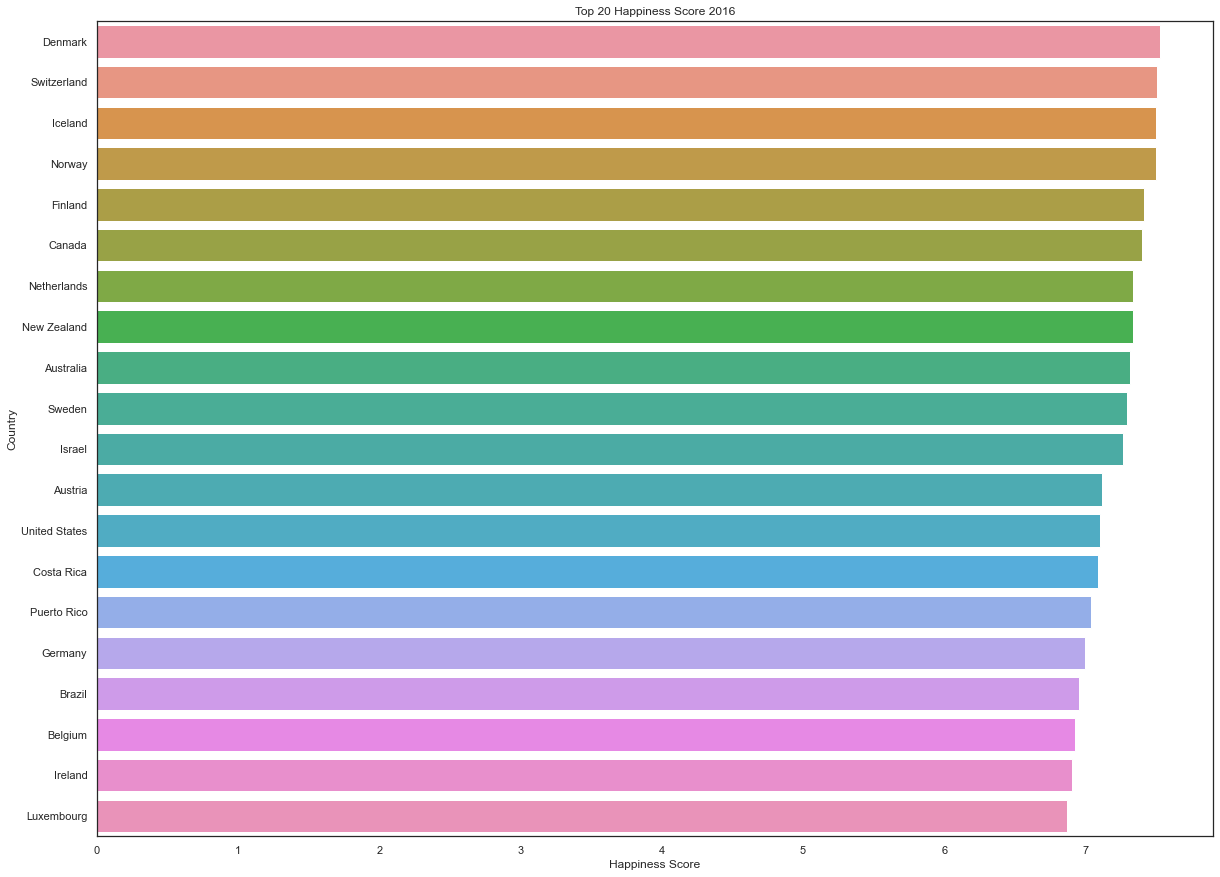

In [58]:
ax = sns.barplot(y="Country", x="Happiness Score", data=top20_2016).set_title("Top 20 Happiness Score 2016")

In [59]:
bottom20_2016 = whr2016.sort_values(by = ["Happiness Score"], ascending = False).tail(20)
print(bottom20_2016)

          Country                           Region  Happiness Rank  \
137       Comoros               Sub-Saharan Africa             138   
138   Ivory Coast               Sub-Saharan Africa             139   
139      Cambodia                Southeastern Asia             140   
140        Angola               Sub-Saharan Africa             141   
141         Niger               Sub-Saharan Africa             142   
142   South Sudan               Sub-Saharan Africa             143   
143          Chad               Sub-Saharan Africa             144   
144  Burkina Faso               Sub-Saharan Africa             145   
145        Uganda               Sub-Saharan Africa             145   
146         Yemen  Middle East and Northern Africa             147   
147    Madagascar               Sub-Saharan Africa             148   
148      Tanzania               Sub-Saharan Africa             149   
149       Liberia               Sub-Saharan Africa             150   
150        Guinea   

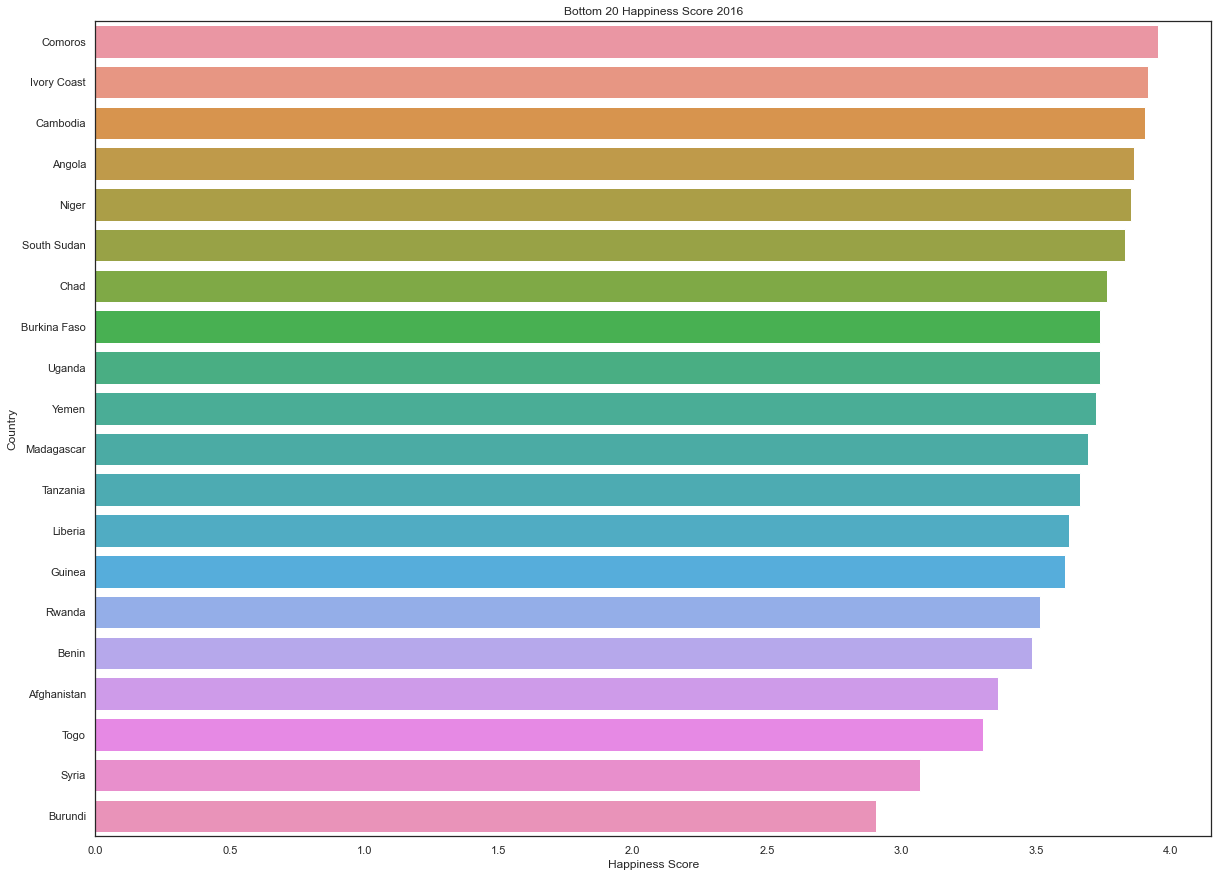

In [60]:
ax = sns.barplot(y="Country", x="Happiness Score", data=bottom20_2016).set_title("Bottom 20 Happiness Score 2016")

In [61]:
top20_2017 = whr2017.sort_values(by = ["Happiness.Score"], ascending = False).head(20)
print(top20_2017)

           Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0           Norway               1            7.537      7.594445   
1          Denmark               2            7.522      7.581728   
2          Iceland               3            7.504      7.622030   
3      Switzerland               4            7.494      7.561772   
4          Finland               5            7.469      7.527542   
5      Netherlands               6            7.377      7.427426   
6           Canada               7            7.316      7.384403   
7      New Zealand               8            7.314      7.379510   
9        Australia              10            7.284      7.356651   
8           Sweden               9            7.284      7.344095   
10          Israel              11            7.213      7.279853   
11      Costa Rica              12            7.079      7.168112   
12         Austria              13            7.006      7.070670   
13   United States              14

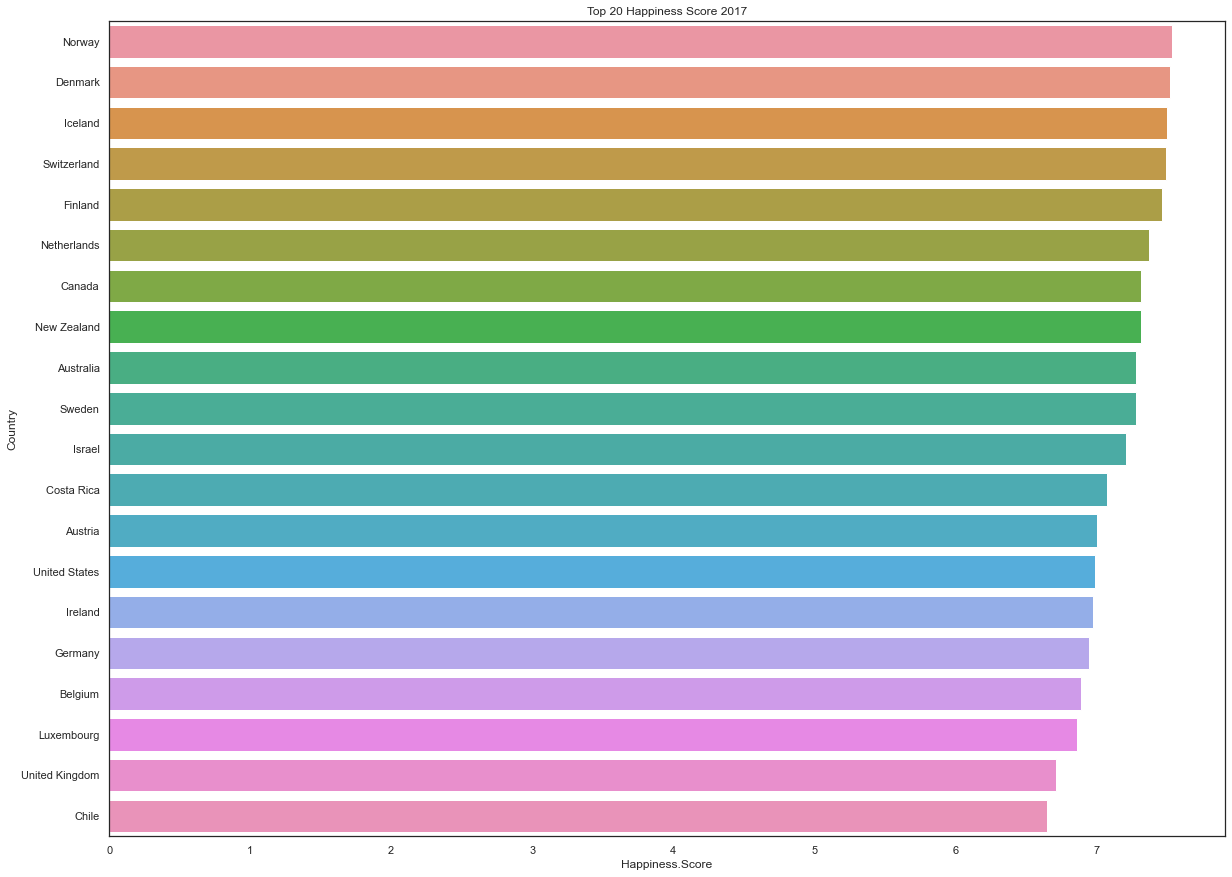

In [62]:
ax = sns.barplot(y="Country", x="Happiness.Score", data=top20_2017).set_title("Top 20 Happiness Score 2017")

In [63]:
bottom20_2017 = whr2017.sort_values(by = ["Happiness.Score"], ascending = False).tail(20)
print(bottom20_2017)

                      Country  Happiness.Rank  Happiness.Score  Whisker.high  \
135                    Malawi             136            3.970      4.077479   
136                      Chad             137            3.936      4.034712   
137                  Zimbabwe             138            3.875      3.978700   
138                   Lesotho             139            3.808      4.044344   
139                    Angola             140            3.795      3.951642   
140               Afghanistan             141            3.794      3.873661   
141                  Botswana             142            3.766      3.874123   
142                     Benin             143            3.657      3.745784   
143                Madagascar             144            3.644      3.714319   
144                     Haiti             145            3.603      3.734715   
145                     Yemen             146            3.593      3.692750   
146               South Sudan           

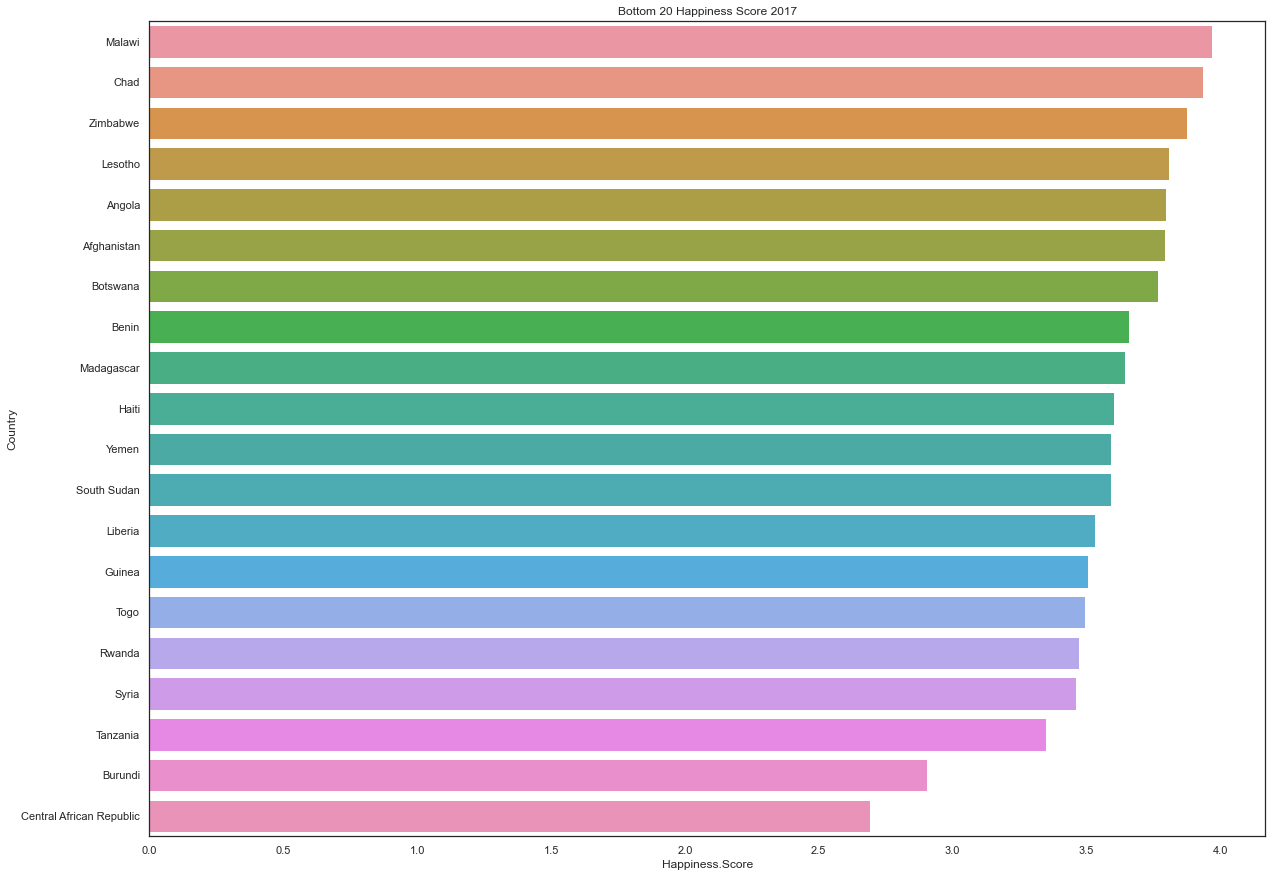

In [64]:
ax = sns.barplot(y="Country", x="Happiness.Score", data=bottom20_2017).set_title("Bottom 20 Happiness Score 2017")

In [65]:
top20_2018 = whr2018.sort_values(by = ["Score"], ascending = False).head(20)
print(top20_2018)

    Overall rank     Country or region  Score  GDP per capita  Social support  \
0              1               Finland  7.632           1.305           1.592   
1              2                Norway  7.594           1.456           1.582   
2              3               Denmark  7.555           1.351           1.590   
3              4               Iceland  7.495           1.343           1.644   
4              5           Switzerland  7.487           1.420           1.549   
5              6           Netherlands  7.441           1.361           1.488   
6              7                Canada  7.328           1.330           1.532   
7              8           New Zealand  7.324           1.268           1.601   
8              9                Sweden  7.314           1.355           1.501   
9             10             Australia  7.272           1.340           1.573   
10            11        United Kingdom  7.190           1.244           1.433   
11            12            

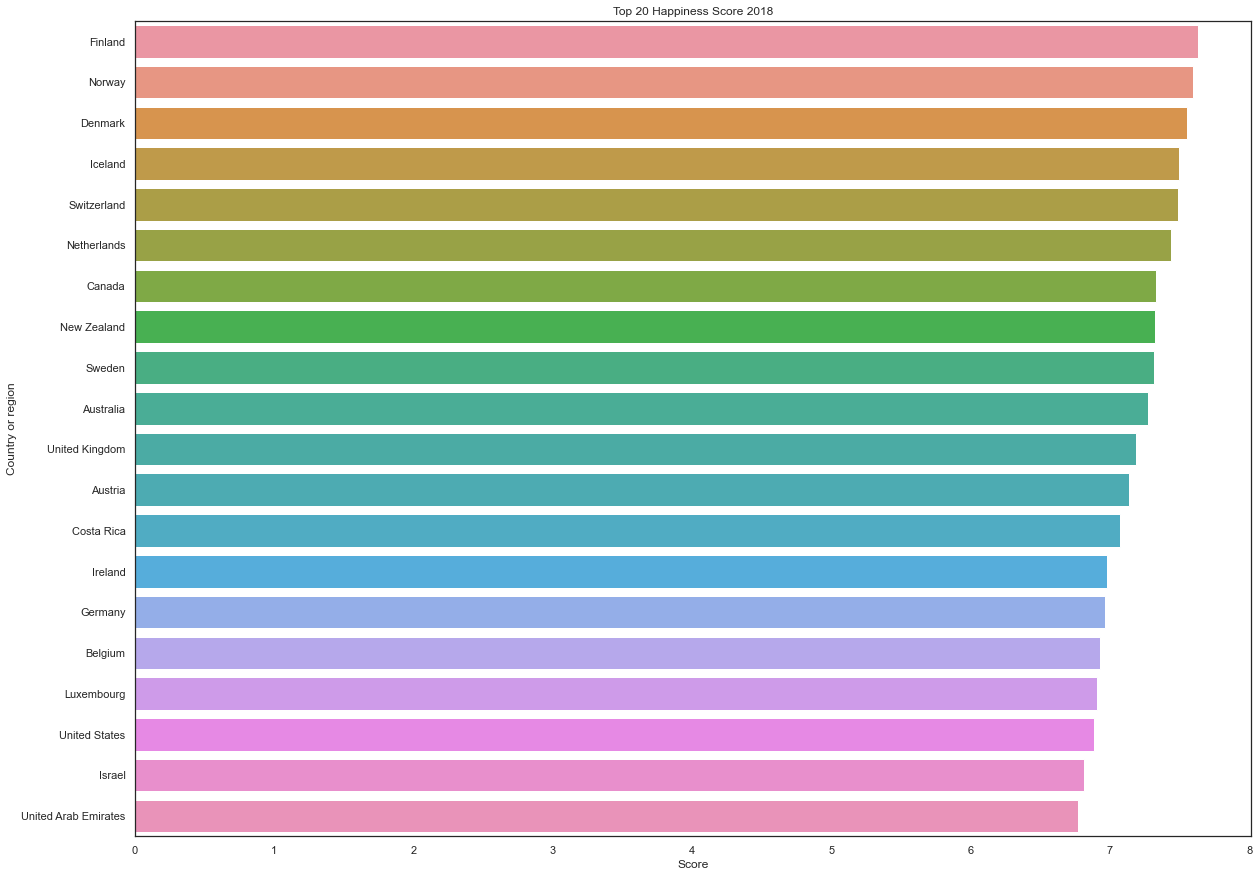

In [66]:
ax = sns.barplot(y="Country or region", x="Score", data=top20_2018).set_title("Top 20 Happiness Score 2018")

In [67]:
bottom20_2018 = whr2018.sort_values(by = ["Score"], ascending = False).tail(20)
print(bottom20_2018)

     Overall rank         Country or region  Score  GDP per capita  \
136           137                     Sudan  4.139           0.605   
137           138                   Ukraine  4.103           0.793   
138           139                      Togo  3.999           0.259   
139           140                    Guinea  3.964           0.344   
140           141                   Lesotho  3.808           0.472   
141           142                    Angola  3.795           0.730   
142           143                Madagascar  3.774           0.262   
143           144                  Zimbabwe  3.692           0.357   
144           145               Afghanistan  3.632           0.332   
145           146                  Botswana  3.590           1.017   
146           147                    Malawi  3.587           0.186   
147           148                     Haiti  3.582           0.315   
148           149                   Liberia  3.495           0.076   
149           150   

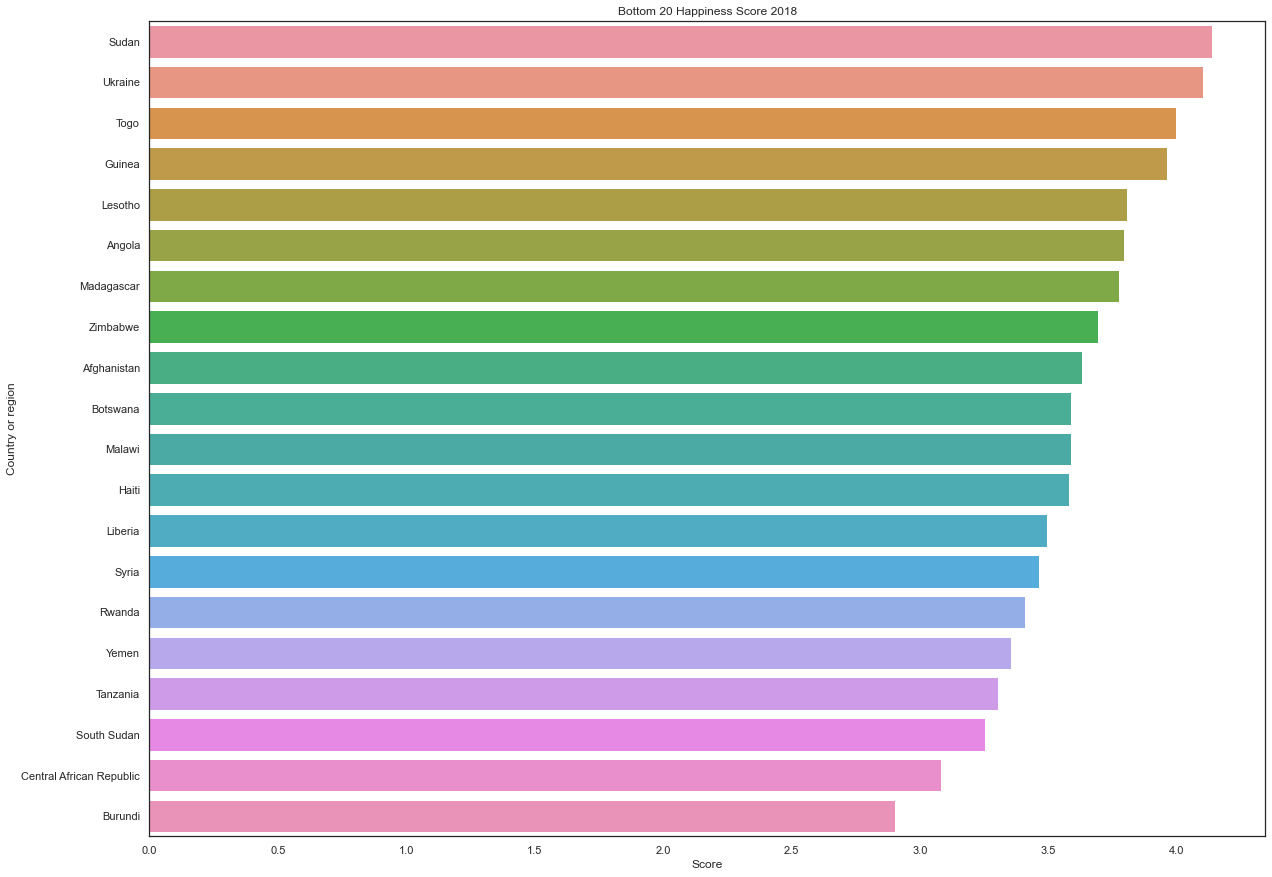

In [68]:
ax = sns.barplot(y="Country or region", x="Score", data=bottom20_2018).set_title("Bottom 20 Happiness Score 2018")

In [69]:
top20_2019 = whr2019.sort_values(by = ["Score"], ascending = False).head(20)
print(top20_2019)

    Overall rank Country or region  Score  GDP per capita  Social support  \
0              1           Finland  7.769           1.340           1.587   
1              2           Denmark  7.600           1.383           1.573   
2              3            Norway  7.554           1.488           1.582   
3              4           Iceland  7.494           1.380           1.624   
4              5       Netherlands  7.488           1.396           1.522   
5              6       Switzerland  7.480           1.452           1.526   
6              7            Sweden  7.343           1.387           1.487   
7              8       New Zealand  7.307           1.303           1.557   
8              9            Canada  7.278           1.365           1.505   
9             10           Austria  7.246           1.376           1.475   
10            11         Australia  7.228           1.372           1.548   
11            12        Costa Rica  7.167           1.034           1.441   

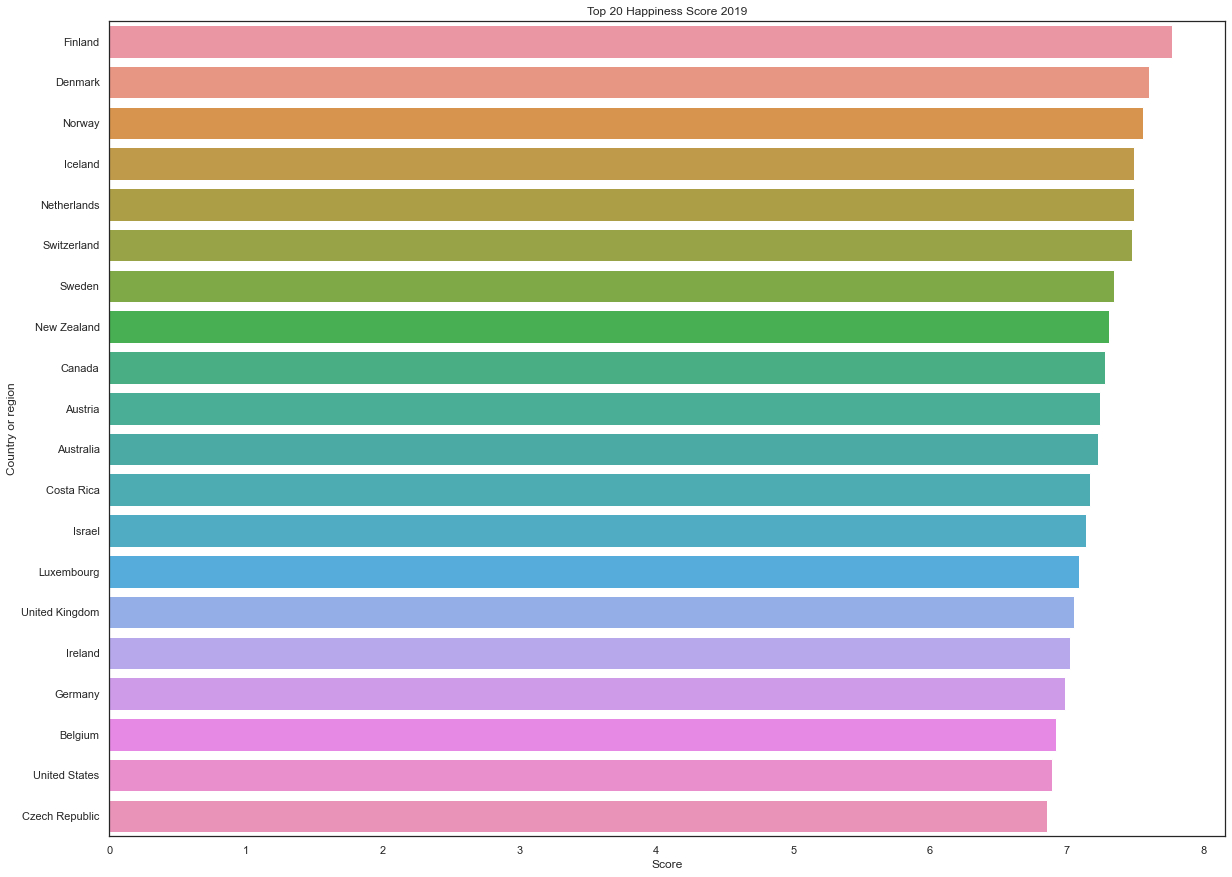

In [70]:
ax = sns.barplot(y="Country or region", x="Score", data=top20_2019).set_title("Top 20 Happiness Score 2019")

In [71]:
bottom20_2019 = whr2019.sort_values(by = ["Score"], ascending = False).tail(20)
print(bottom20_2019)

     Overall rank         Country or region  Score  GDP per capita  \
136           137                     Egypt  4.166           0.913   
137           138                    Zambia  4.107           0.578   
138           139                      Togo  4.085           0.275   
139           140                     India  4.015           0.755   
140           141                   Liberia  3.975           0.073   
141           142                   Comoros  3.973           0.274   
142           143                Madagascar  3.933           0.274   
143           144                   Lesotho  3.802           0.489   
144           145                   Burundi  3.775           0.046   
145           146                  Zimbabwe  3.663           0.366   
146           147                     Haiti  3.597           0.323   
147           148                  Botswana  3.488           1.041   
148           149                     Syria  3.462           0.619   
149           150   

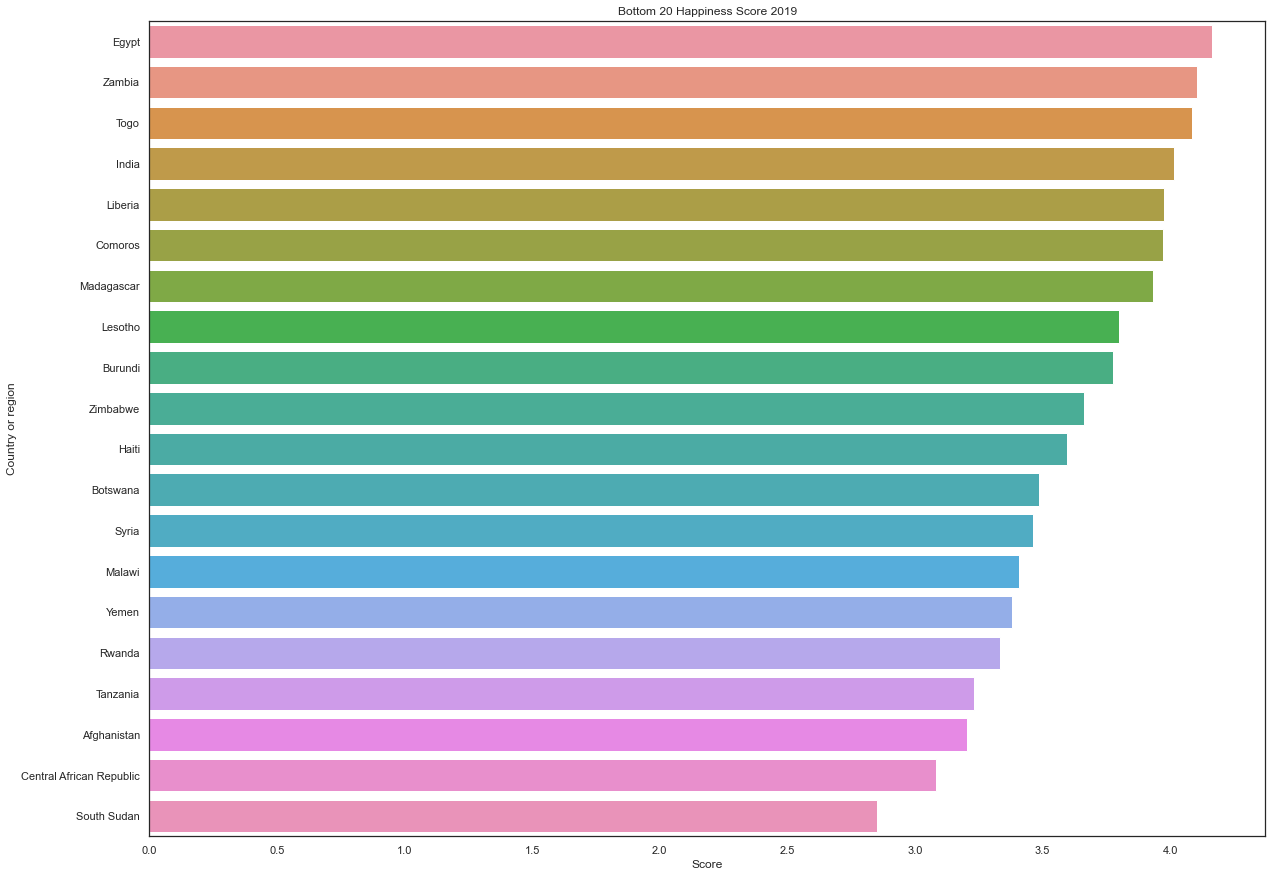

In [72]:
ax = sns.barplot(y="Country or region", x="Score", data=bottom20_2019).set_title("Bottom 20 Happiness Score 2019")

### Happiness Score By Region

It appears, that there are patterns, in terms of regions and their happiness score. The Top 20 has a high number of european and north american countries, while the Bottom 20 has a high number of african countries. I want to explore the differnce between regions further. Unfortunately, the region category is only present for the 2015 and 2016 data sets. The information is available though, because countries don't switch regions over time (at least in this case). I create a dataframe with the country names and their region and use a merge operation to include the region column in the 2017, 2018 and 2019 data sets.

In [73]:
regions = whr2015[["Country", "Region"]].copy()
whr2017 = whr2017.merge(right=regions, left_on=["Country"], right_on=["Country"]).copy()
whr2018 = whr2018.merge(right=regions, left_on=["Country or region"], right_on=["Country"]).copy()
whr2019 = whr2019.merge(right=regions, left_on=["Country or region"], right_on=["Country"]).copy()
print(whr2017.head())



       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  \
0

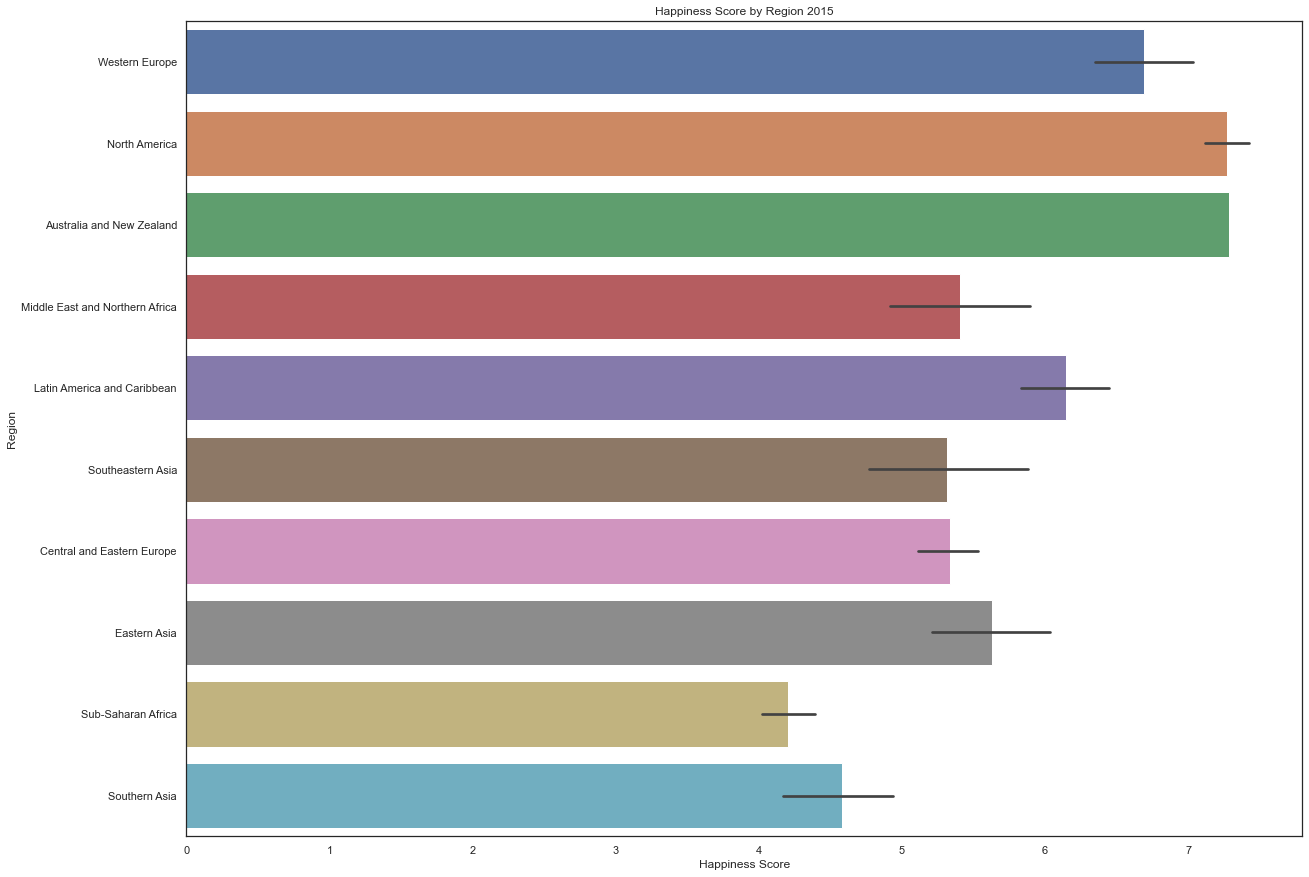

In [74]:
ax = sns.barplot(y="Region", x="Happiness Score", data=whr2015.sort_values(by="Happiness Score", ascending=False)).set_title("Happiness Score by Region 2015")

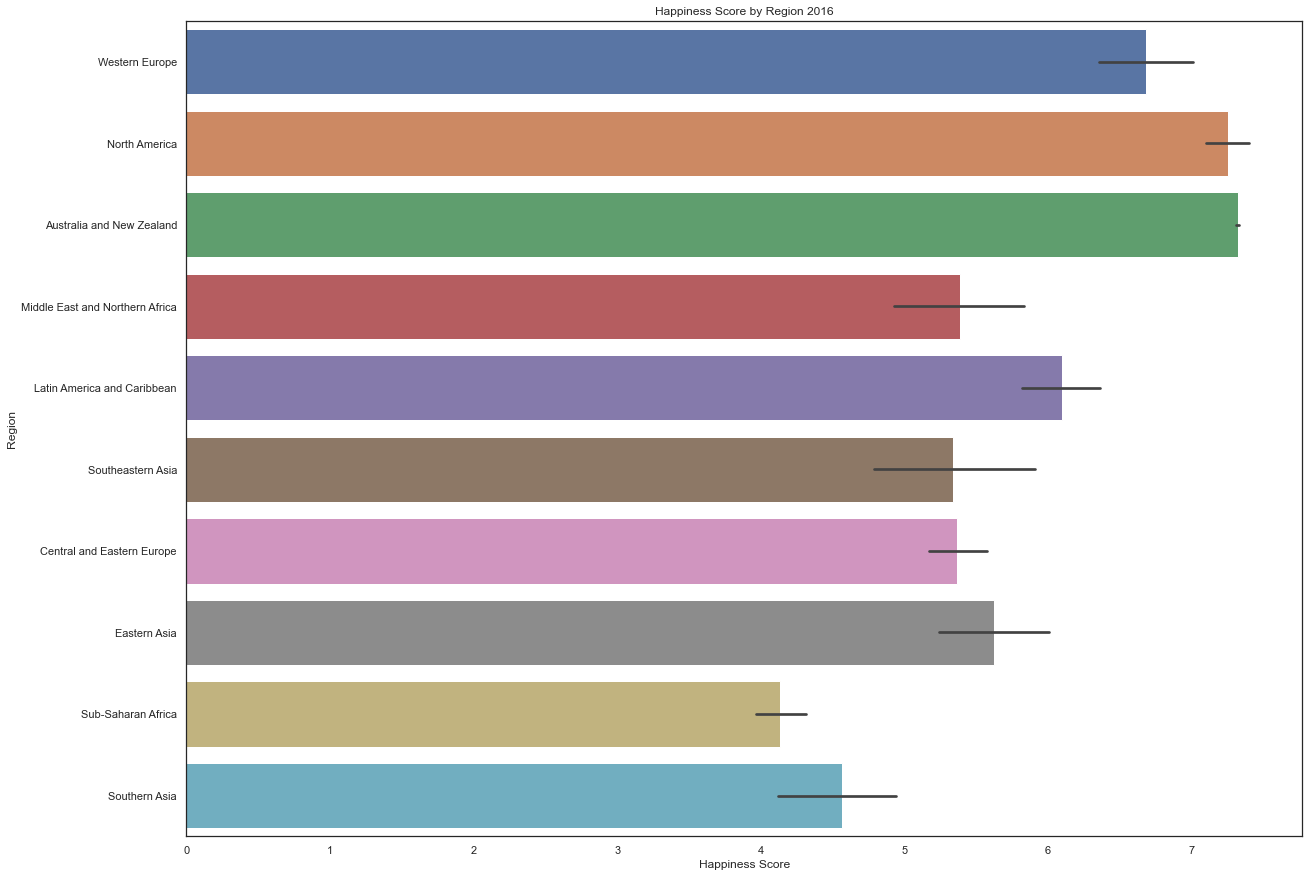

In [75]:
ax = sns.barplot(y="Region", x="Happiness Score", data=whr2016.sort_values(by="Happiness Score", ascending=False)).set_title("Happiness Score by Region 2016")

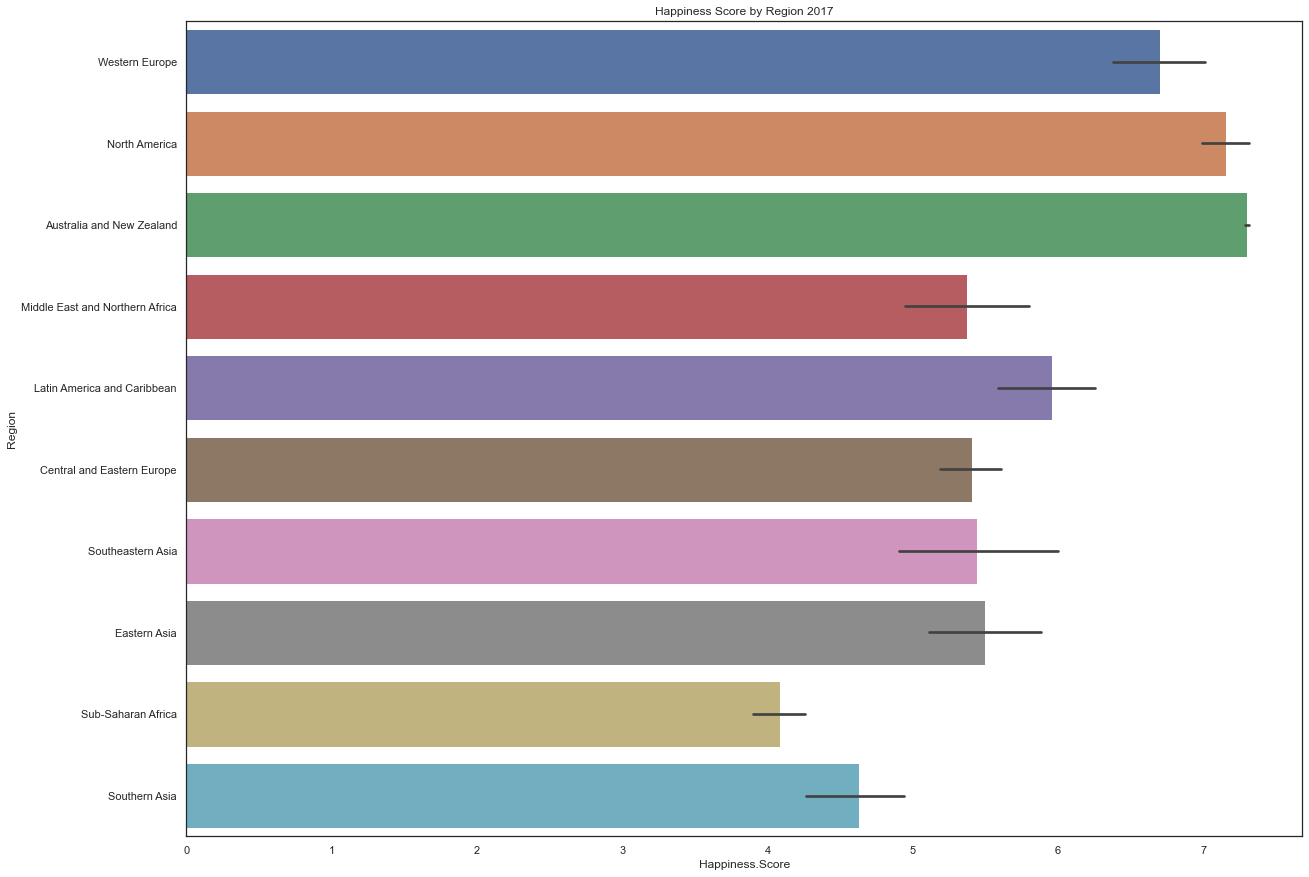

In [76]:
ax = sns.barplot(y="Region", x="Happiness.Score", data=whr2017.sort_values(by="Happiness.Score", ascending=False)).set_title("Happiness Score by Region 2017")

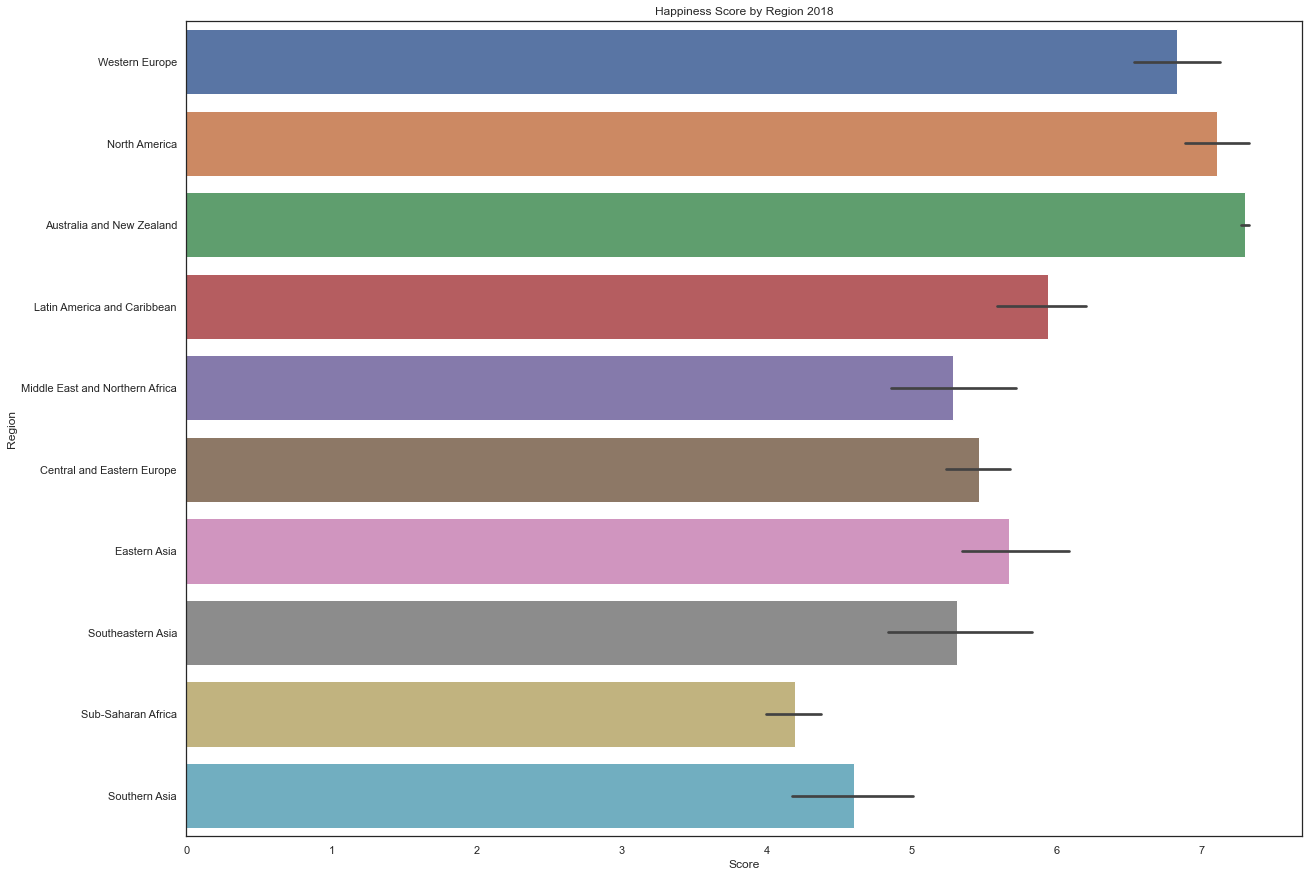

In [77]:
ax = sns.barplot(y="Region", x="Score", data=whr2018.sort_values(by="Score", ascending=False)).set_title("Happiness Score by Region 2018")

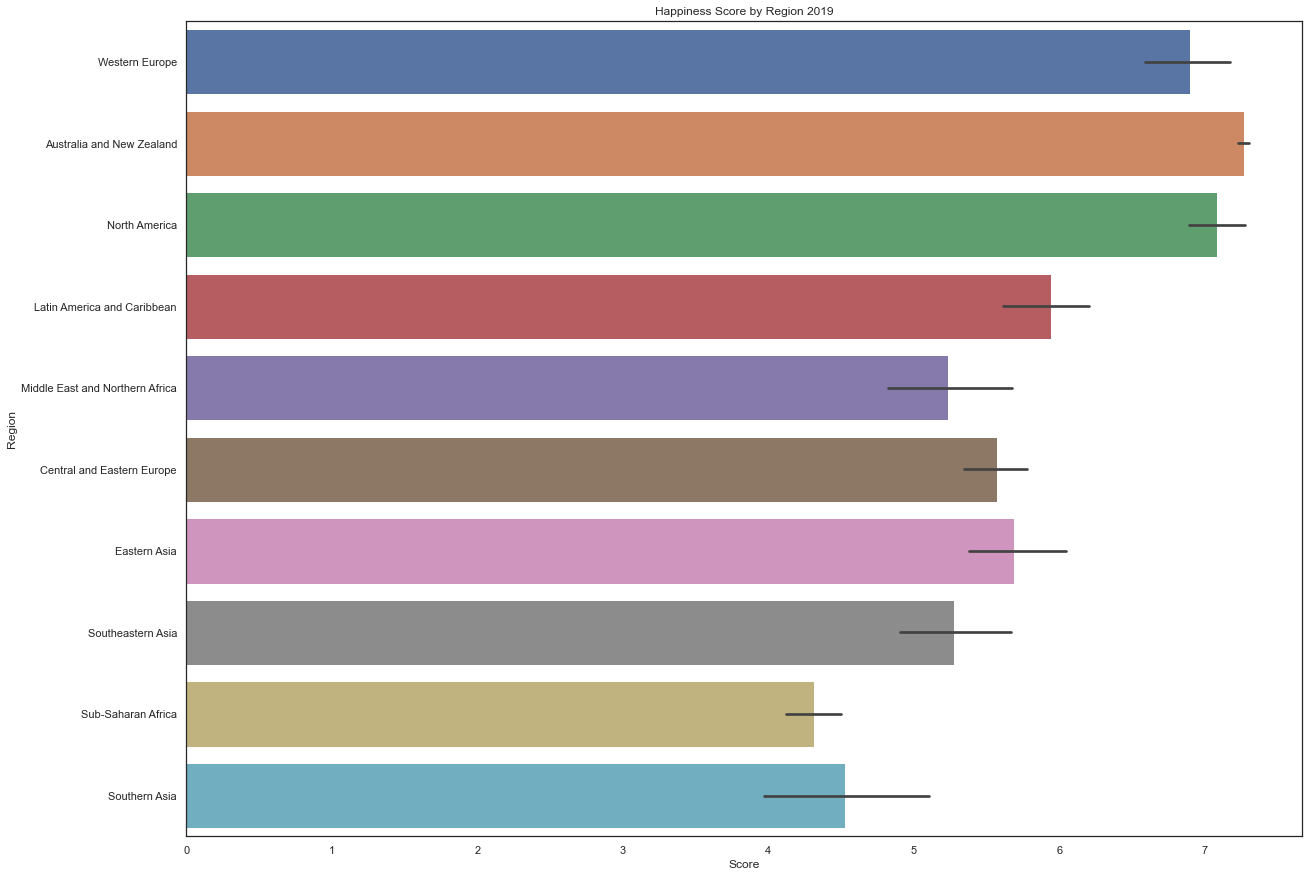

In [78]:
ax = sns.barplot(y="Region", x="Score", data=whr2019.sort_values(by="Score", ascending=False)).set_title("Happiness Score by Region 2019")

### Conclusion

There are strong correlations between the stage of development of a country and their happiness score. The most industrialized regions of Australia and New Zealand, Western Europe and North America have the highest scores on average, whereas underdevelopped regions like Sub-Saharan Africa, Southern Asia and Middle East and Northern Africa have the lowest scores. 